In [62]:
import numpy as np
import matplotlib.pyplot as plt

### Приближённое решение задачи Коши для обыкновенных дифференциальных уравнений.
Необходимо для функции задачи Коши методами:
1. Эйлера
2. Рунге-Кутты 4 порядка точности
3. Адамса третьего порядка точности
найти приближённое решение задачи Коши для обыкновенного дифференцильного уравнения на отрезке $[0,1]$.\
Шаг сетки $h = 0.05$
4. Используя расчёт на грубой сетке с $h = 0.1$, найти оценку точности по Рунге для половины узлов подробной сетки (только для решения полученного с четвёртым порядком точности по методу Рунге-Кутты).

**Задача Коши для приближённого решения** (вариант 23)

$$
\begin{cases}
u^{''}(x) - 2(tg(x))u^{'}(x) + \frac{\ 1}{\cos^{4}(x)}u(x) = \frac{\ th(x)}{\cos^{4}(x)},\\
u(0) = 1,\\
u^{'}(0) = 1
\end{cases}
$$



Точное решение $u_0(x) = \tan(x) + \cos(\tan(x))$

In [63]:
def u0(x):
    return np.tan(x) + np.cos(np.tan(x))

In [64]:
def du_dx(x):
    return 1/(np.cos(x)**2) - np.sin(np.tan(x))/(np.cos(x)**2)

#### Превратим систему с дифференциальным уравнением 2-го порядка в систему с дифференциальным уравнением 1-го порядка.

$$
u''(x) - 2tg(x) \cdot u'(x) + \frac{1}{\cos^4(x)}u(x) = \frac{tg(x)}{\cos^4(x)}
$$

Вводим новые переменные:

$$
\begin{cases}
y_1(x) = u(x) \\
y_2(x) = u'(x)
\end{cases}
$$

##### Система уравнений первого порядка

Получаем систему:

$$
\begin{cases}
\dfrac{dy_1}{dx} = y_2(x) \\[1em]
\dfrac{dy_2}{dx} = 2tg(x) \cdot y_2(x) - \dfrac{1}{\cos^4(x)}y_1(x) + \dfrac{tg(x)}{\cos^4(x)}
\end{cases}
$$

##### Начальные условия

$$
\vec{y}(0) = \begin{pmatrix} 1 \\ 1 \end{pmatrix}
$$

##### Точное решение

$$
u_0(x) = tg(x) + \cos(tg(x))
$$

In [65]:
def system_equation(x, y):
    y1, y2 = y
    cos_4 = np.abs(np.cos(x)) ** 4
    if (cos_4 < 1e-12):
        cos_4 = 1e-12 # защита от деления на ноль
    dy1_dx = y2
    dy2_dx = 2 * np.tan(x) * y2 - (y1 / (np.cos(x) ** 4)) + np.tan(x) / (np.cos(x) ** 4)
    return np.array([dy1_dx, dy2_dx])

#### Начальные условия.

In [66]:
y0 = np.array([1.0, 1.0]) 
a = 0
h = [0.05, 0.1]
b = 1.0
n = 1000

#### Метод Эйлера
$$
y_{n+1} = y_n + hf(x_n, y_n),
$$
$$
x_{n+1} = x_n + h
$$

In [67]:
def euler_method(f, y0, h):
    n = int((b - a) / h)
    x = np.linspace(a, b, n + 1)
    y = np.zeros((n + 1, len(y0)))
    y[0] = y0
    
    for i in range(n):
        y[i + 1] = y[i] + h * f(x[i], y[i])
    
    return x, y

Шаг h = 0.05:
Количество точек: 21
Погрешность в конечной точке: 0.018648395628042103


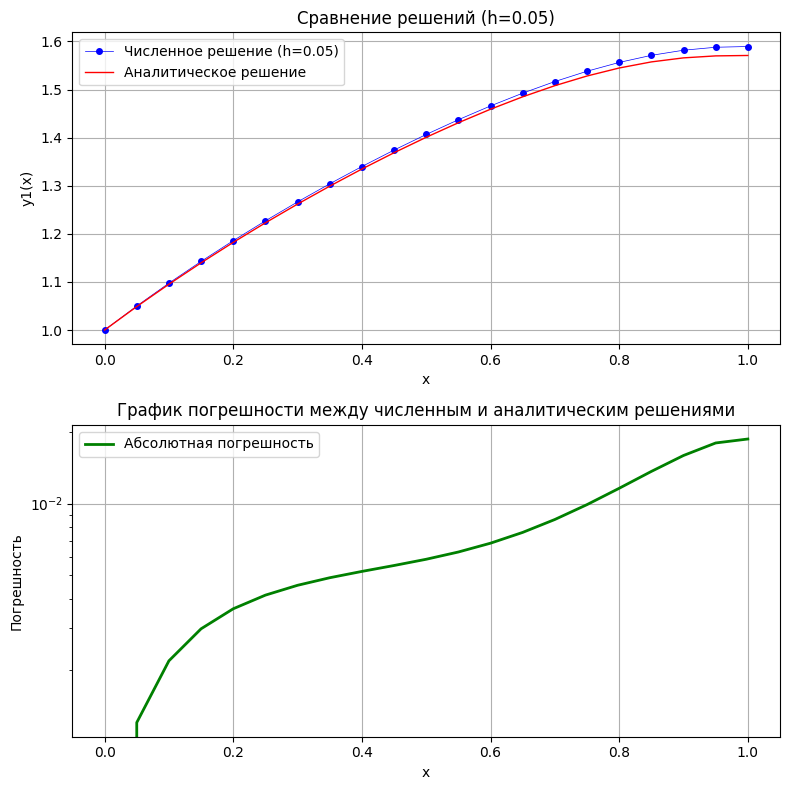

Максимальная погрешность: 1.864840e-02
Средняя погрешность: 7.478471e-03
Погрешность в начальной точке: 0.000000e+00
Погрешность в конечной точке: 1.864840e-02


In [68]:
x, y = euler_method(system_equation, y0, h[0])
u_analytic = u0(x)

print(f"Шаг h = {h[0]}:")
print(f"Количество точек: {len(x)}")
print(f"Погрешность в конечной точке: {abs(y[-1, 0] - u_analytic[-1])}")

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(x, y[:, 0], 'b-', label=f'Численное решение (h={h[0]})', linewidth = 0.5, marker = 'o', markersize = 4)
plt.plot(x, u_analytic, label='Аналитическое решение', color = 'r', linewidth = 1)
plt.xlabel('x')
plt.ylabel('y1(x)')
plt.title(f'Сравнение решений (h={h[0]})')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
error = np.abs(y[:, 0] - u_analytic)
plt.semilogy(x, error, 'g-', label='Абсолютная погрешность', linewidth=2)
plt.xlabel('x')
plt.ylabel('Погрешность')
plt.title('График погрешности между численным и аналитическим решениями')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Максимальная погрешность: {np.max(error):.6e}")
print(f"Средняя погрешность: {np.mean(error):.6e}")
print(f"Погрешность в начальной точке: {error[0]:.6e}")
print(f"Погрешность в конечной точке: {error[-1]:.6e}")

#### Метод Эйлера 3-го порядка

In [69]:
def euler_3rd_order(f, y0, h):
    n = int((b - a) / h)
    x = np.linspace(a, b, n + 1)
    y = np.zeros((n + 1, len(y0)))
    y[0] = y0
    
    for i in range(n):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + h/2, y[i] + k1/2)
        k3 = h * f(x[i] + h, y[i] - k1 + 2*k2)
        
        y[i + 1] = y[i] + (k1 + 4*k2 + k3) / 6
    
    return x, y

Шаг h = 0.05:
Количество точек: 21
Погрешность в конечной точке: 2.315054999457722e-05


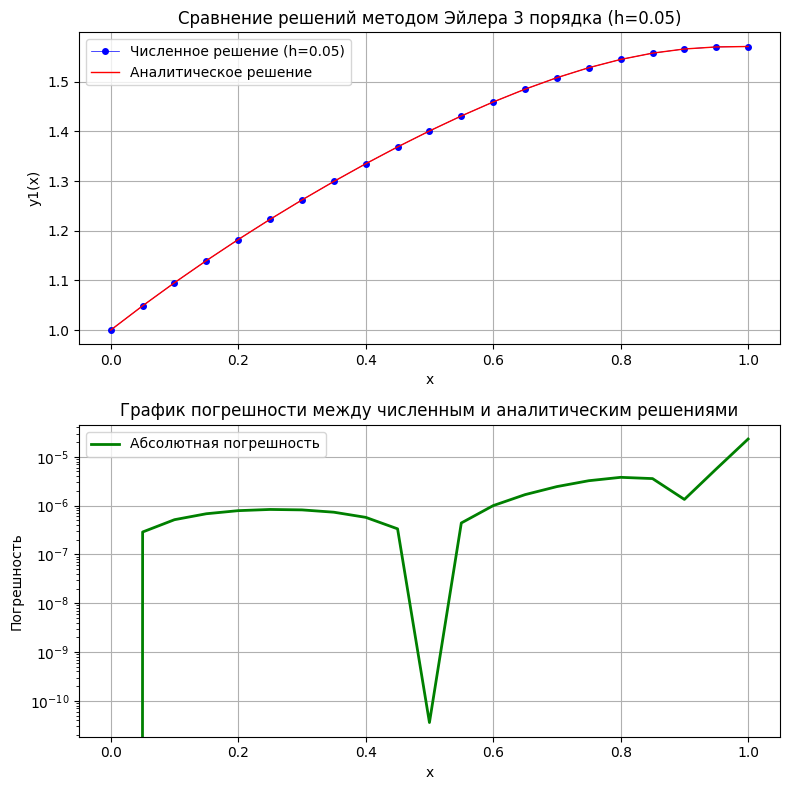

Максимальная погрешность: 2.315055e-05
Средняя погрешность: 2.470269e-06
Погрешность в начальной точке: 0.000000e+00
Погрешность в конечной точке: 2.315055e-05


In [70]:
x, y = euler_3rd_order(system_equation, y0, h[0])
u_analytic = u0(x)

print(f"Шаг h = {h[0]}:")
print(f"Количество точек: {len(x)}")
print(f"Погрешность в конечной точке: {abs(y[-1, 0] - u_analytic[-1])}")

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(x, y[:, 0], 'b-', label=f'Численное решение (h={h[0]})', linewidth = 0.5, marker = 'o', markersize = 4)
plt.plot(x, u_analytic, label='Аналитическое решение', color = 'r', linewidth = 1)
plt.xlabel('x')
plt.ylabel('y1(x)')
plt.title(f'Сравнение решений методом Эйлера 3 порядка (h={h[0]})')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
error = np.abs(y[:, 0] - u_analytic)
plt.semilogy(x, error, 'g-', label='Абсолютная погрешность', linewidth=2)
plt.xlabel('x')
plt.ylabel('Погрешность')
plt.title('График погрешности между численным и аналитическим решениями')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig(fname = "Эйлер 3 порядка")
plt.show()

print(f"Максимальная погрешность: {np.max(error):.6e}")
print(f"Средняя погрешность: {np.mean(error):.6e}")
print(f"Погрешность в начальной точке: {error[0]:.6e}")
print(f"Погрешность в конечной точке: {error[-1]:.6e}")

#### Теперь применим метод Рунге-Кутты 4 порядка для нахождения решения для этой системы.
$$
K_1 = hf(x_n, y_n),
$$
$$
K_2 = hf(x_n + h/2, y_n + K_1/2),
$$
$$
K_3 = hf(x_n + h/2, y_n + K_2/2),
$$
$$
K_4 = hf(x_n + h, y_n + K_3),
$$
$$
y_{n+1} = y_n + (K_1 + 2K_2 + 2K_3 + K_4)/6
$$

In [71]:
def runge_kutta(f, y0, h):
    n = int((b - a) / h)
    x = np.zeros(n + 1)
    y = np.zeros((n + 1, len(y0)))
    
    x[0] = a
    y[0] = y0

    for i in range(n):
        K1 = h * f(x[i], y[i])
        K2 = h * f(x[i] + h / 2, y[i] + K1 / 2)
        K3 = h * f(x[i] + h / 2, y[i] + K2 / 2)
        K4 = h * f(x[i] + h, y[i] + K3)

        y[i + 1] = y[i] + (K1 + 2*K2 + 2*K3 + K4) / 6
        x[i + 1] = x[i] + h
    
    return x, y

#### Значение в точке x = 1.

In [25]:
print(u0(1))

1.570795926803578


#### Оценка погрешности для метода Рунге-Кутты 4 порядка точности.

Сводная таблица погрешностей для $h = 0.1$

In [73]:
print(f"{'x':<10} {'u(x) числ.':<15} {'u(x) точн.':<15} {'Оценка Рунге u(x)':<20} {'u\'(x) числ.':<15} {'u\'(x) точн.':<15} {'Оценка Рунге u\'(x)':<20}")

for i in range(len(x2)):
    print(f"{x2[i]:<10.2f} {u_numerical2[i]:<15.6f} {u_exact2[i]:<15.6f} {runge_error_u[i]:<20.2e} "
          f"{u_prime_numerical2[i]:<15.6f} {u_prime_exact2[i]:<15.6f} {runge_error_u_prime[i]:<20.2e}")

x          u(x) числ.      u(x) точн.      Оценка Рунге u(x)    u'(x) числ.     u'(x) точн.     Оценка Рунге u'(x)  
0.00       1.000000        1.000000        0.00e+00             1.000000        1.000000        0.00e+00            
0.10       1.095305        1.095305        4.81e-09             0.908893        0.908892        3.69e-08            
0.20       1.182235        1.182235        5.26e-09             0.831495        0.831494        7.31e-08            
0.30       1.261872        1.261872        1.47e-09             0.762134        0.762132        1.13e-07            
0.40       1.334740        1.334740        6.59e-09             0.695103        0.695100        1.63e-07            
0.50       1.400754        1.400754        1.81e-08             0.623866        0.623863        2.37e-07            
0.60       1.459102        1.459102        2.81e-08             0.540239        0.540234        3.70e-07            
0.70       1.508046        1.508045        1.38e-08             

Оценка погрешности по Рунге для h = 0.1:
Максимальная оценка погрешности u(x): 0.000003
Максимальная оценка погрешности u'(x): 0.000008


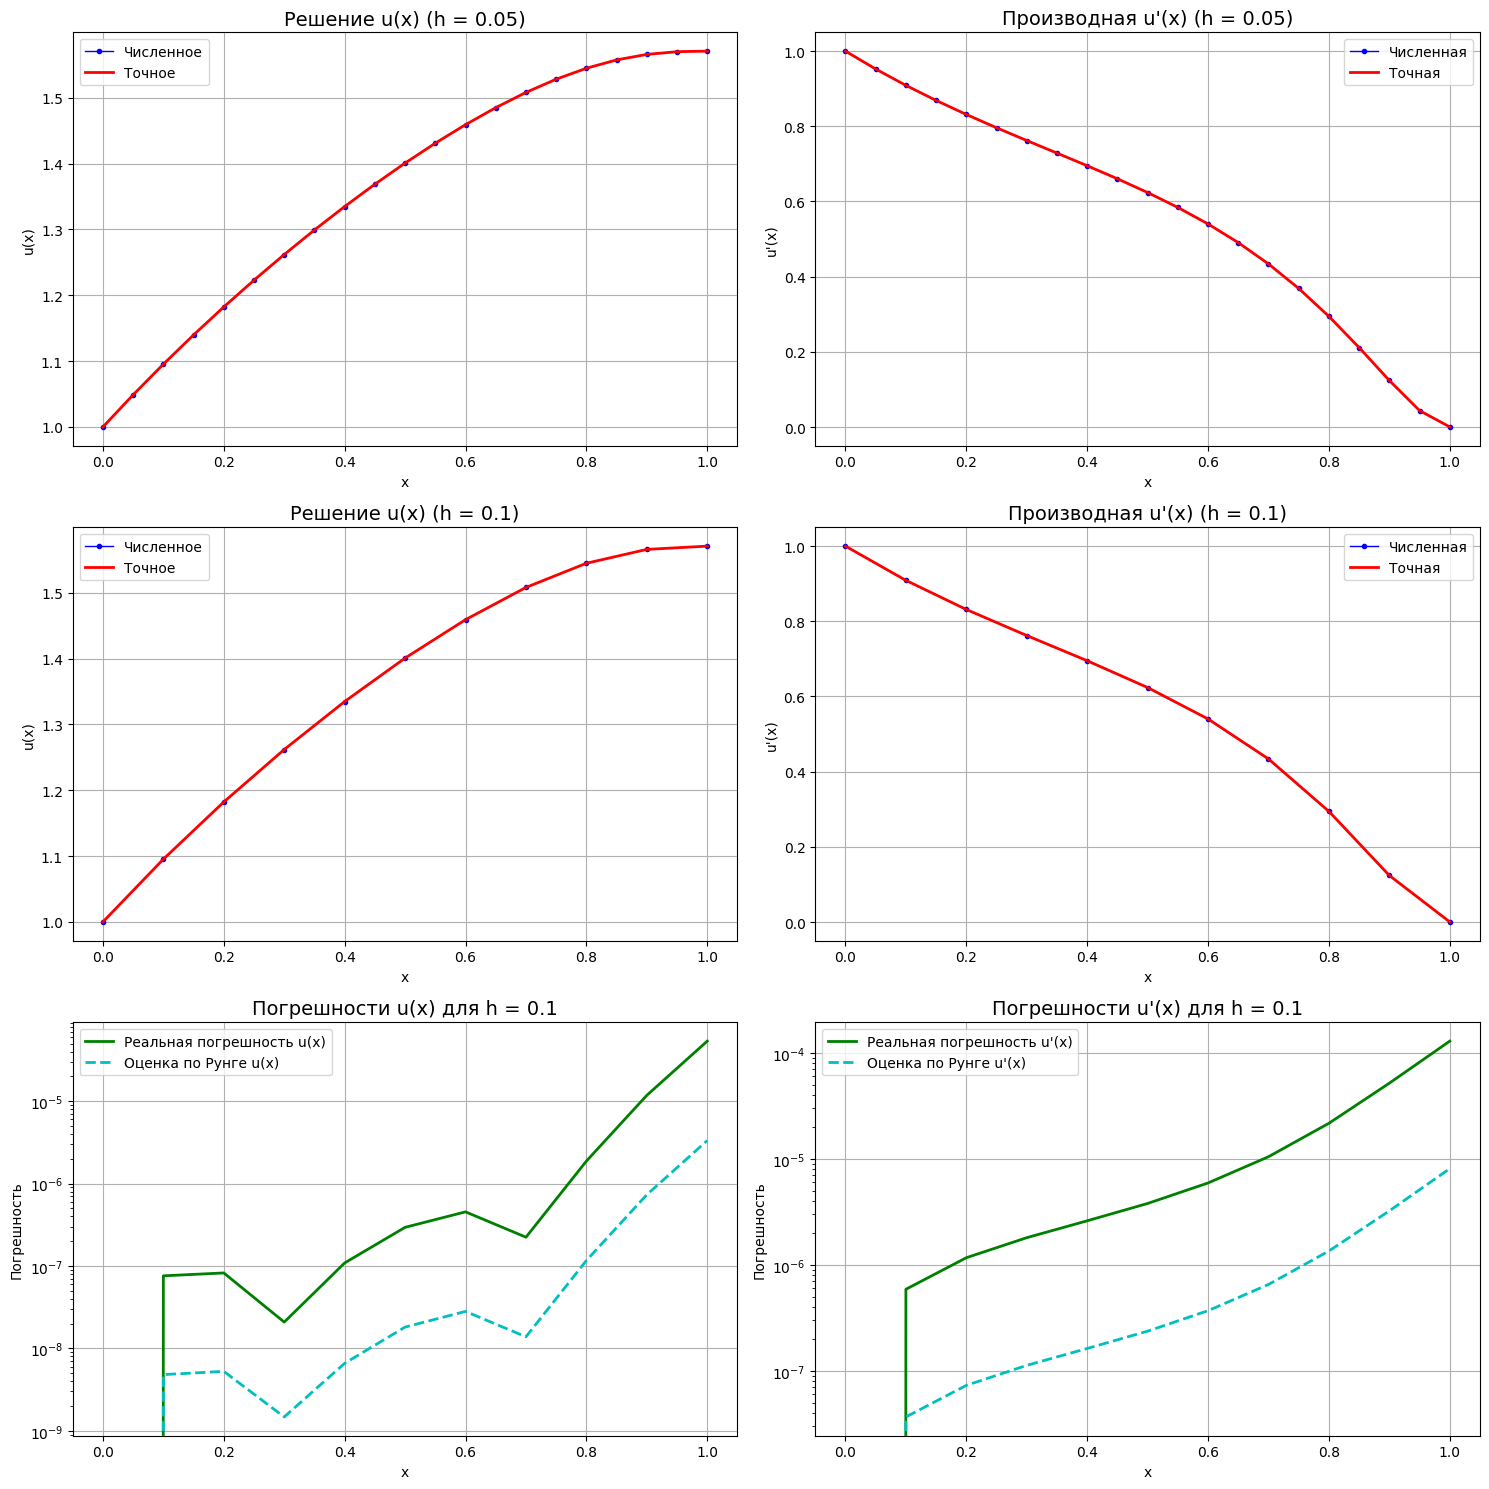

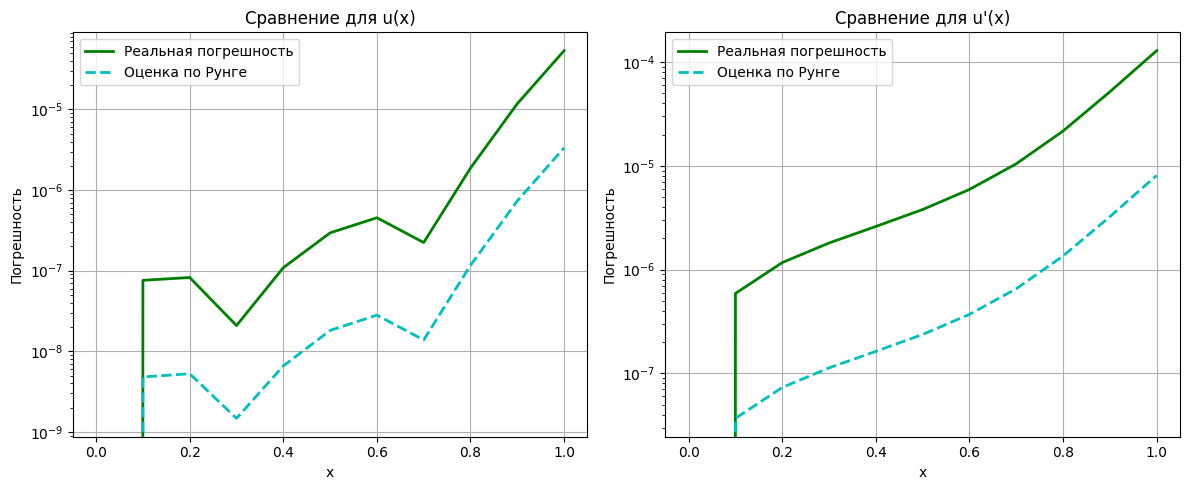

In [72]:
# Решение для h[0] = 0.05
x1, y_solution1 = runge_kutta(system_equation, y0, h[0])
u_numerical1 = y_solution1[:, 0]
u_prime_numerical1 = y_solution1[:, 1]
u_exact1 = u0(x1)
u_prime_exact1 = du_dx(x1)
error_u1 = np.abs(u_numerical1 - u_exact1)
error_u_prime1 = np.abs(u_prime_numerical1 - u_prime_exact1)

# Решение для h[1] = 0.1
x2, y_solution2 = runge_kutta(system_equation, y0, h[1])
u_numerical2 = y_solution2[:, 0]
u_prime_numerical2 = y_solution2[:, 1]
u_exact2 = u0(x2)
u_prime_exact2 = du_dx(x2)
error_u2 = np.abs(u_numerical2 - u_exact2)
error_u_prime2 = np.abs(u_prime_numerical2 - u_prime_exact2)

# ОЦЕНКА ПОГРЕШНОСТИ ПО РУНГЕ ДЛЯ h = 0.1
# Берем каждую вторую точку из подробного решения (h=0.05) для сравнения с грубым (h=0.1)
u_numerical1_half = u_numerical1[::2]  # Берем каждую вторую точку
u_prime_numerical1_half = u_prime_numerical1[::2]

# Оценка погрешности по Рунге для метода 4-го порядка
p = 4  # порядок метода Рунге-Кутты
runge_error_u = np.abs(u_numerical2 - u_numerical1_half) / (2**p - 1)
runge_error_u_prime = np.abs(u_prime_numerical2 - u_prime_numerical1_half) / (2**p - 1)

print(f"Оценка погрешности по Рунге для h = {h[1]}:")
print(f"Максимальная оценка погрешности u(x): {np.max(runge_error_u):.6f}")
print(f"Максимальная оценка погрешности u'(x): {np.max(runge_error_u_prime):.6f}")

plt.figure(figsize=(15, 15))

# Для h = 0.05
plt.subplot(3, 2, 1)
plt.plot(x1, u_numerical1, 'bo-', markersize=3, linewidth=1, label='Численное')
plt.plot(x1, u_exact1, 'r-', linewidth=2, label='Точное')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title(f'Решение u(x) (h = {h[0]})', fontsize = 14)
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(x1, u_prime_numerical1, 'bo-', markersize=3, linewidth=1, label='Численная')
plt.plot(x1, u_prime_exact1, 'r-', linewidth=2, label='Точная')
plt.xlabel('x')
plt.ylabel("u'(x)")
plt.title(f'Производная u\'(x) (h = {h[0]})', fontsize = 14)
plt.legend()
plt.grid(True)

# Для h = 0.1
plt.subplot(3, 2, 3)
plt.plot(x2, u_numerical2, 'bo-', markersize=3, linewidth=1, label='Численное')
plt.plot(x2, u_exact2, 'r-', linewidth=2, label='Точное')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title(f'Решение u(x) (h = {h[1]})', fontsize = 14)
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(x2, u_prime_numerical2, 'bo-', markersize=3, linewidth=1, label='Численная')
plt.plot(x2, u_prime_exact2, 'r-', linewidth=2, label='Точная')
plt.xlabel('x')
plt.ylabel("u'(x)")
plt.title(f'Производная u\'(x) (h = {h[1]})', fontsize = 14)
plt.legend()
plt.grid(True)

# Погрешности и оценка по Рунге
plt.subplot(3, 2, 5)
plt.semilogy(x2, error_u2, 'g-', linewidth=2, label='Реальная погрешность u(x)')
plt.semilogy(x2, runge_error_u, 'c--', linewidth=2, label='Оценка по Рунге u(x)')
plt.xlabel('x')
plt.ylabel('Погрешность')
plt.title(f'Погрешности u(x) для h = {h[1]}', fontsize = 14)
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 6)
plt.semilogy(x2, error_u_prime2, 'g-', linewidth=2, label="Реальная погрешность u'(x)")
plt.semilogy(x2, runge_error_u_prime, 'c--', linewidth=2, label="Оценка по Рунге u'(x)")
plt.xlabel('x')
plt.ylabel('Погрешность')
plt.title(f"Погрешности u'(x) для h = {h[1]}", fontsize = 14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Дополнительный анализ: сравнение реальной погрешности и оценки по Рунге
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogy(x2, error_u2, 'g-', linewidth=2, label='Реальная погрешность')
plt.semilogy(x2, runge_error_u, 'c--', linewidth=2, label='Оценка по Рунге')
plt.xlabel('x')
plt.ylabel('Погрешность')
plt.title('Сравнение для u(x)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogy(x2, error_u_prime2, 'g-', linewidth=2, label='Реальная погрешность')
plt.semilogy(x2, runge_error_u_prime, 'c--', linewidth=2, label='Оценка по Рунге')
plt.xlabel('x')
plt.ylabel('Погрешность')
plt.title("Сравнение для u'(x)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Метод Рунге-Кутты 5 порядка точности

In [74]:
def runge_kutta_5th_order(f, y0, h):
    n = int((b - a) / h)
    x = np.zeros(n + 1)
    y = np.zeros((n + 1, len(y0)))
    
    x[0] = a
    y[0] = y0

    for i in range(n):
        K1 = h * f(x[i], y[i])
        K2 = h * f(x[i] + h/4, y[i] + K1/4)
        K3 = h * f(x[i] + h/4, y[i] + K1/8 + K2/8)
        K4 = h * f(x[i] + h/2, y[i] - K2/2 + K3)
        K5 = h * f(x[i] + 3*h/4, y[i] + 3*K1/16 + 9*K4/16)
        K6 = h * f(x[i] + h, y[i] - 3*K1/7 + 2*K2/7 + 12*K3/7 - 12*K4/7 + 8*K5/7)

        y[i + 1] = y[i] + (7*K1 + 32*K3 + 12*K4 + 32*K5 + 7*K6) / 90
        x[i + 1] = x[i] + h
    
    return x, y

In [75]:
# Решение для h[0] = 0.05
x1, y_solution1 = runge_kutta_5th_order(system_equation, y0, h[0])
u_numerical1 = y_solution1[:, 0]
u_prime_numerical1 = y_solution1[:, 1]
u_exact1 = u0(x1)
u_prime_exact1 = du_dx(x1)
error_u1 = np.abs(u_numerical1 - u_exact1)
error_u_prime1 = np.abs(u_prime_numerical1 - u_prime_exact1)

# Решение для h[1] = 0.1
x2, y_solution2 = runge_kutta_5th_order(system_equation, y0, h[1])
u_numerical2 = y_solution2[:, 0]
u_prime_numerical2 = y_solution2[:, 1]
u_exact2 = u0(x2)
u_prime_exact2 = du_dx(x2)
error_u2 = np.abs(u_numerical2 - u_exact2)
error_u_prime2 = np.abs(u_prime_numerical2 - u_prime_exact2)

u_numerical1_half = u_numerical1[::2]  # Берем каждую вторую точку
u_prime_numerical1_half = u_prime_numerical1[::2]

p = 5 
runge_error_u = np.abs(u_numerical2 - u_numerical1_half) / (2**p - 1)
runge_error_u_prime = np.abs(u_prime_numerical2 - u_prime_numerical1_half) / (2**p - 1)

print(f"Оценка погрешности по Рунге для h = {h[1]}:")
print(f"Максимальная оценка погрешности u(x): {np.max(runge_error_u):.6f}")
print(f"Максимальная оценка погрешности u'(x): {np.max(runge_error_u_prime):.6f}")

Оценка погрешности по Рунге для h = 0.1:
Максимальная оценка погрешности u(x): 0.000000
Максимальная оценка погрешности u'(x): 0.000000


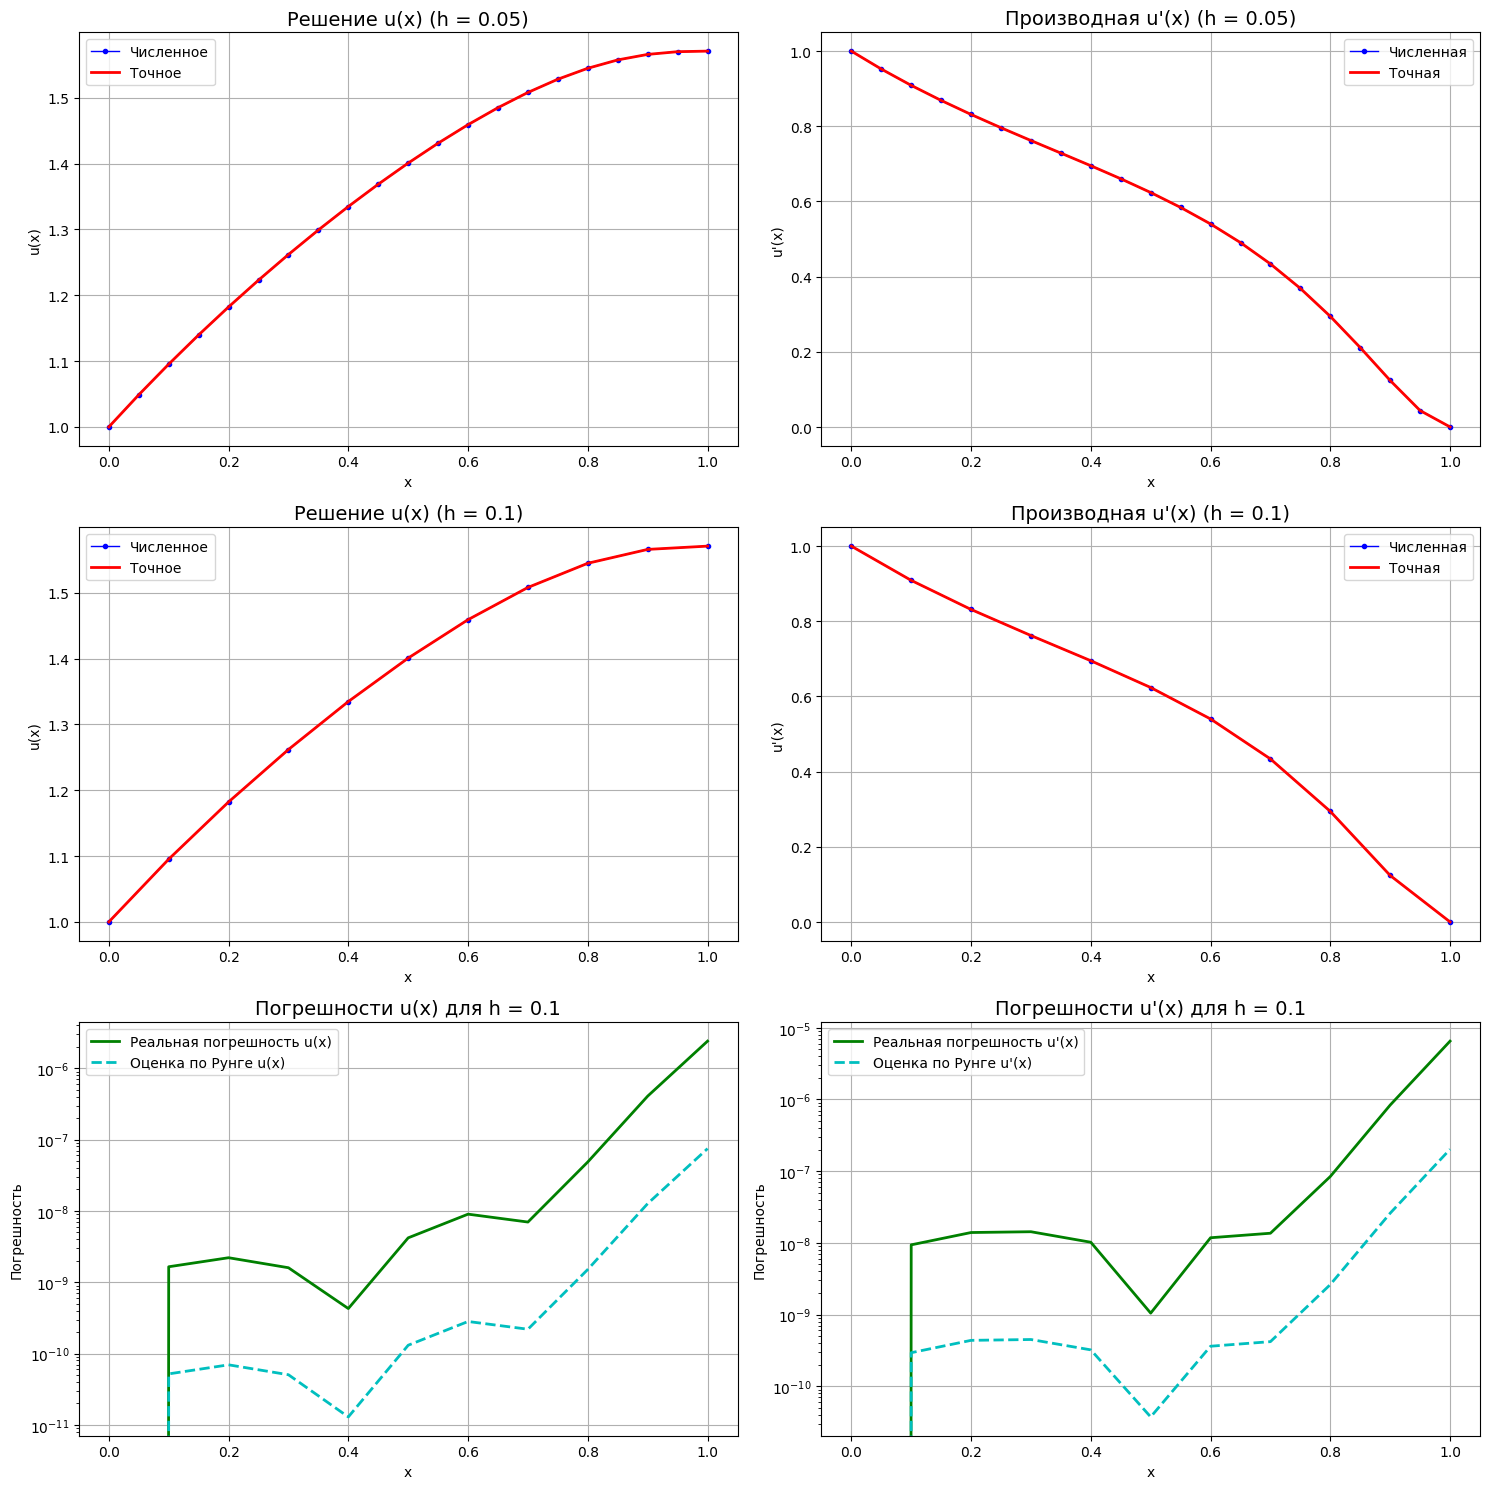

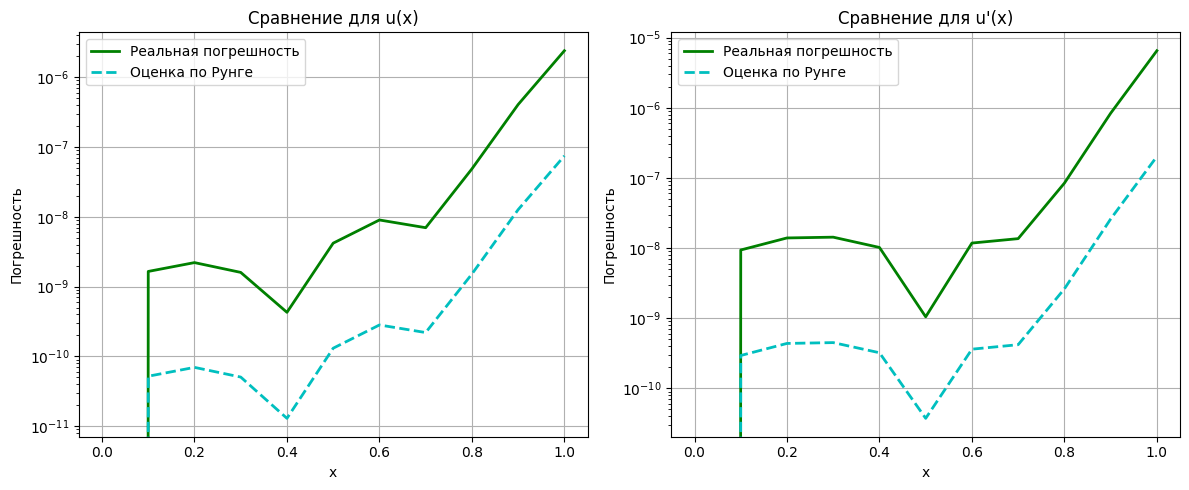

In [79]:
plt.figure(figsize=(15, 15))

# Для h = 0.05
plt.subplot(3, 2, 1)
plt.plot(x1, u_numerical1, 'bo-', markersize=3, linewidth=1, label='Численное')
plt.plot(x1, u_exact1, 'r-', linewidth=2, label='Точное')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title(f'Решение u(x) (h = {h[0]})', fontsize = 14)
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(x1, u_prime_numerical1, 'bo-', markersize=3, linewidth=1, label='Численная')
plt.plot(x1, u_prime_exact1, 'r-', linewidth=2, label='Точная')
plt.xlabel('x')
plt.ylabel("u'(x)")
plt.title(f'Производная u\'(x) (h = {h[0]})', fontsize = 14)
plt.legend()
plt.grid(True)

# Для h = 0.1
plt.subplot(3, 2, 3)
plt.plot(x2, u_numerical2, 'bo-', markersize=3, linewidth=1, label='Численное')
plt.plot(x2, u_exact2, 'r-', linewidth=2, label='Точное')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title(f'Решение u(x) (h = {h[1]})', fontsize = 14)
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(x2, u_prime_numerical2, 'bo-', markersize=3, linewidth=1, label='Численная')
plt.plot(x2, u_prime_exact2, 'r-', linewidth=2, label='Точная')
plt.xlabel('x')
plt.ylabel("u'(x)")
plt.title(f'Производная u\'(x) (h = {h[1]})', fontsize = 14)
plt.legend()
plt.grid(True)

# Погрешности и оценка по Рунге
plt.subplot(3, 2, 5)
plt.semilogy(x2, error_u2, 'g-', linewidth=2, label='Реальная погрешность u(x)')
plt.semilogy(x2, runge_error_u, 'c--', linewidth=2, label='Оценка по Рунге u(x)')
plt.xlabel('x')
plt.ylabel('Погрешность')
plt.title(f'Погрешности u(x) для h = {h[1]}', fontsize = 14)
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 6)
plt.semilogy(x2, error_u_prime2, 'g-', linewidth=2, label="Реальная погрешность u'(x)")
plt.semilogy(x2, runge_error_u_prime, 'c--', linewidth=2, label="Оценка по Рунге u'(x)")
plt.xlabel('x')
plt.ylabel('Погрешность')
plt.title(f"Погрешности u'(x) для h = {h[1]}", fontsize = 14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Дополнительный анализ: сравнение реальной погрешности и оценки по Рунге
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogy(x2, error_u2, 'g-', linewidth=2, label='Реальная погрешность')
plt.semilogy(x2, runge_error_u, 'c--', linewidth=2, label='Оценка по Рунге')
plt.xlabel('x')
plt.ylabel('Погрешность')
plt.title('Сравнение для u(x)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogy(x2, error_u_prime2, 'g-', linewidth=2, label='Реальная погрешность')
plt.semilogy(x2, runge_error_u_prime, 'c--', linewidth=2, label='Оценка по Рунге')
plt.xlabel('x')
plt.ylabel('Погрешность')
plt.title("Сравнение для u'(x)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Применим метод Адамса 3 порядка для нахождения решения той же самой системы.

$$
y_{n+1} = y_n + (h/12)·(23f_n - 16f_{n-1} + 5f_{n-2})
$$

In [80]:
def adams(f, y0, h):
    n = int((b - a) / h) + 1
    x = np.linspace(a, b, n)
    
    y0 = np.array(y0)
    if y0.ndim == 0:
        dim = 1
        y = np.zeros(n)
    else:
        dim = len(y0)
        y = np.zeros((n, dim))
    y[0] = y0
    
    for i in range(min(2, n-1)):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + h/2, y[i] + k1/2)
        k3 = h * f(x[i] + h/2, y[i] + k2/2)
        k4 = h * f(x[i] + h, y[i] + k3)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
        
    for i in range(2, n-1):
        f_n = f(x[i], y[i])
        f_n1 = f(x[i-1], y[i-1])
        f_n2 = f(x[i-2], y[i-2])
        
        y[i+1] = y[i] + (h/12) * (23*f_n - 16*f_n1 + 5*f_n2)
    
    return x, y

In [81]:
x_adams, y_adams = adams(system_equation, y0, h[0])

u_adams = y_adams[:, 0]
u_prime_adams = y_adams[:, 1]

u_exact_adams = u0(x_adams)
u_prime_exact_adams = du_dx(x_adams)

error_u_adams = np.abs(u_adams - u_exact_adams)
error_u_prime_adams = np.abs(u_prime_adams - u_prime_exact_adams)

max_error_u_adams = np.max(error_u_adams)
max_error_u_prime_adams = np.max(error_u_prime_adams)
mean_error_u_adams = np.mean(error_u_adams)
mean_error_u_prime_adams = np.mean(error_u_prime_adams)
rms_error_u_adams = np.sqrt(np.mean(error_u_adams**2))
rms_error_u_prime_adams = np.sqrt(np.mean(error_u_prime_adams**2))

print(f"u({b}) = {u_adams[-1]:.6f}")
print(f"u'({b}) = {u_prime_adams[-1]:.6f}")

print(f"  Интервал: [{a}, {b}]")
print(f"  Шаг: h = {h[0]}")
print(f"  Количество шагов: {len(x_adams) - 1}")
print()

print(f"  u(x):")
print(f"    Максимальная погрешность: {max_error_u_adams:.2e}")
print(f"    Средняя погрешность: {mean_error_u_adams:.2e}")
print(f"    СКЗ погрешность: {rms_error_u_adams:.2e}")
print()

print(f"  u'(x):")
print(f"    Максимальная погрешность: {max_error_u_prime_adams:.2e}")
print(f"    Средняя погрешность: {mean_error_u_prime_adams:.2e}")
print(f"    СКЗ погрешность: {rms_error_u_prime_adams:.2e}")
print()

print(f"  x = {b:.2f}:")
print(f"    Численное u({b:.2f}) = {u_adams[-1]:.8f}")
print(f"    Точное u({b:.2f})    = {u_exact_adams[-1]:.8f}")
print(f"    Погрешность         = {error_u_adams[-1]:.2e}")
print()

u(1.0) = 1.569364
u'(1.0) = -0.017488
  Интервал: [0, 1.0]
  Шаг: h = 0.05
  Количество шагов: 20

  u(x):
    Максимальная погрешность: 1.43e-03
    Средняя погрешность: 1.82e-04
    СКЗ погрешность: 3.49e-04

  u'(x):
    Максимальная погрешность: 1.78e-02
    Средняя погрешность: 1.49e-03
    СКЗ погрешность: 4.31e-03

  x = 1.00:
    Численное u(1.00) = 1.56936449
    Точное u(1.00)    = 1.57079593
    Погрешность         = 1.43e-03



In [82]:
# Метод Эйлера
x_euler, y_euler = euler_method(system_equation, y0, h[0])
u_euler = y_euler[:, 0]
u_prime_euler = y_euler[:, 1]
u_exact_euler = u0(x_euler)
u_prime_exact_euler = du_dx(x_euler)
error_u_euler = np.abs(u_euler - u_exact_euler)
error_u_prime_euler = np.abs(u_prime_euler - u_prime_exact_euler)

# Метод Рунге-Кутты
x_rk, y_rk = runge_kutta(system_equation, y0, h[0])
u_rk = y_rk[:, 0]
u_prime_rk = y_rk[:, 1]
u_exact_rk = u0(x_rk)
u_prime_exact_rk = du_dx(x_rk)
error_u_rk = np.abs(u_rk - u_exact_rk)
error_u_prime_rk = np.abs(u_prime_rk - u_prime_exact_rk)

# Метод Адамса
x_adams, y_adams = adams(system_equation, y0, h[0])
u_adams = y_adams[:, 0]
u_prime_adams = y_adams[:, 1]
u_exact_adams = u0(x_adams)
u_prime_exact_adams = du_dx(x_adams)
error_u_adams = np.abs(u_adams - u_exact_adams)
error_u_prime_adams = np.abs(u_prime_adams - u_prime_exact_adams)

header = f"{'Метод':<15} {'u(1.0)':<12} {'u_prime(1.0)':<12} {'Макс. погр. u':<15} {'Макс. погр. u_prime':<15} {'Сред. погр. u':<15}"
print(header)
print("-" * 85)

methods_data = [
    ('Эйлер', u_euler[-1], u_prime_euler[-1], np.max(error_u_euler), np.max(error_u_prime_euler), np.mean(error_u_euler)),
    ('Рунге-Кутта', u_rk[-1], u_prime_rk[-1], np.max(error_u_rk), np.max(error_u_prime_rk), np.mean(error_u_rk)),
    ('Адамс', u_adams[-1], u_prime_adams[-1], np.max(error_u_adams), np.max(error_u_prime_adams), np.mean(error_u_adams)),
    ('Точное', u_exact_adams[-1], u_prime_exact_adams[-1], 0, 0, 0)
]

for method, u_val, u_prime_val, max_err_u, max_err_u_prime, mean_err_u in methods_data:
    if method == 'Точное':
        print(f"{method:<15} {u_val:<12.6f} {u_prime_val:<12.6f} {'-':<15} {'-':<15} {'-':<15}")
    else:
        print(f"{method:<15} {u_val:<12.6f} {u_prime_val:<12.6f} {max_err_u:<15.2e} {max_err_u_prime:<15.2e} {mean_err_u:<15.2e}")

Метод           u(1.0)       u_prime(1.0) Макс. погр. u   Макс. погр. u_prime Сред. погр. u  
-------------------------------------------------------------------------------------
Эйлер           1.589444     -0.047402    1.86e-02        4.77e-02        7.48e-03       
Рунге-Кутта     1.570792     0.000314     3.55e-06        7.41e-06        3.19e-07       
Адамс           1.569364     -0.017488    1.43e-03        1.78e-02        1.82e-04       
Точное          1.570796     0.000307     -               -               -              


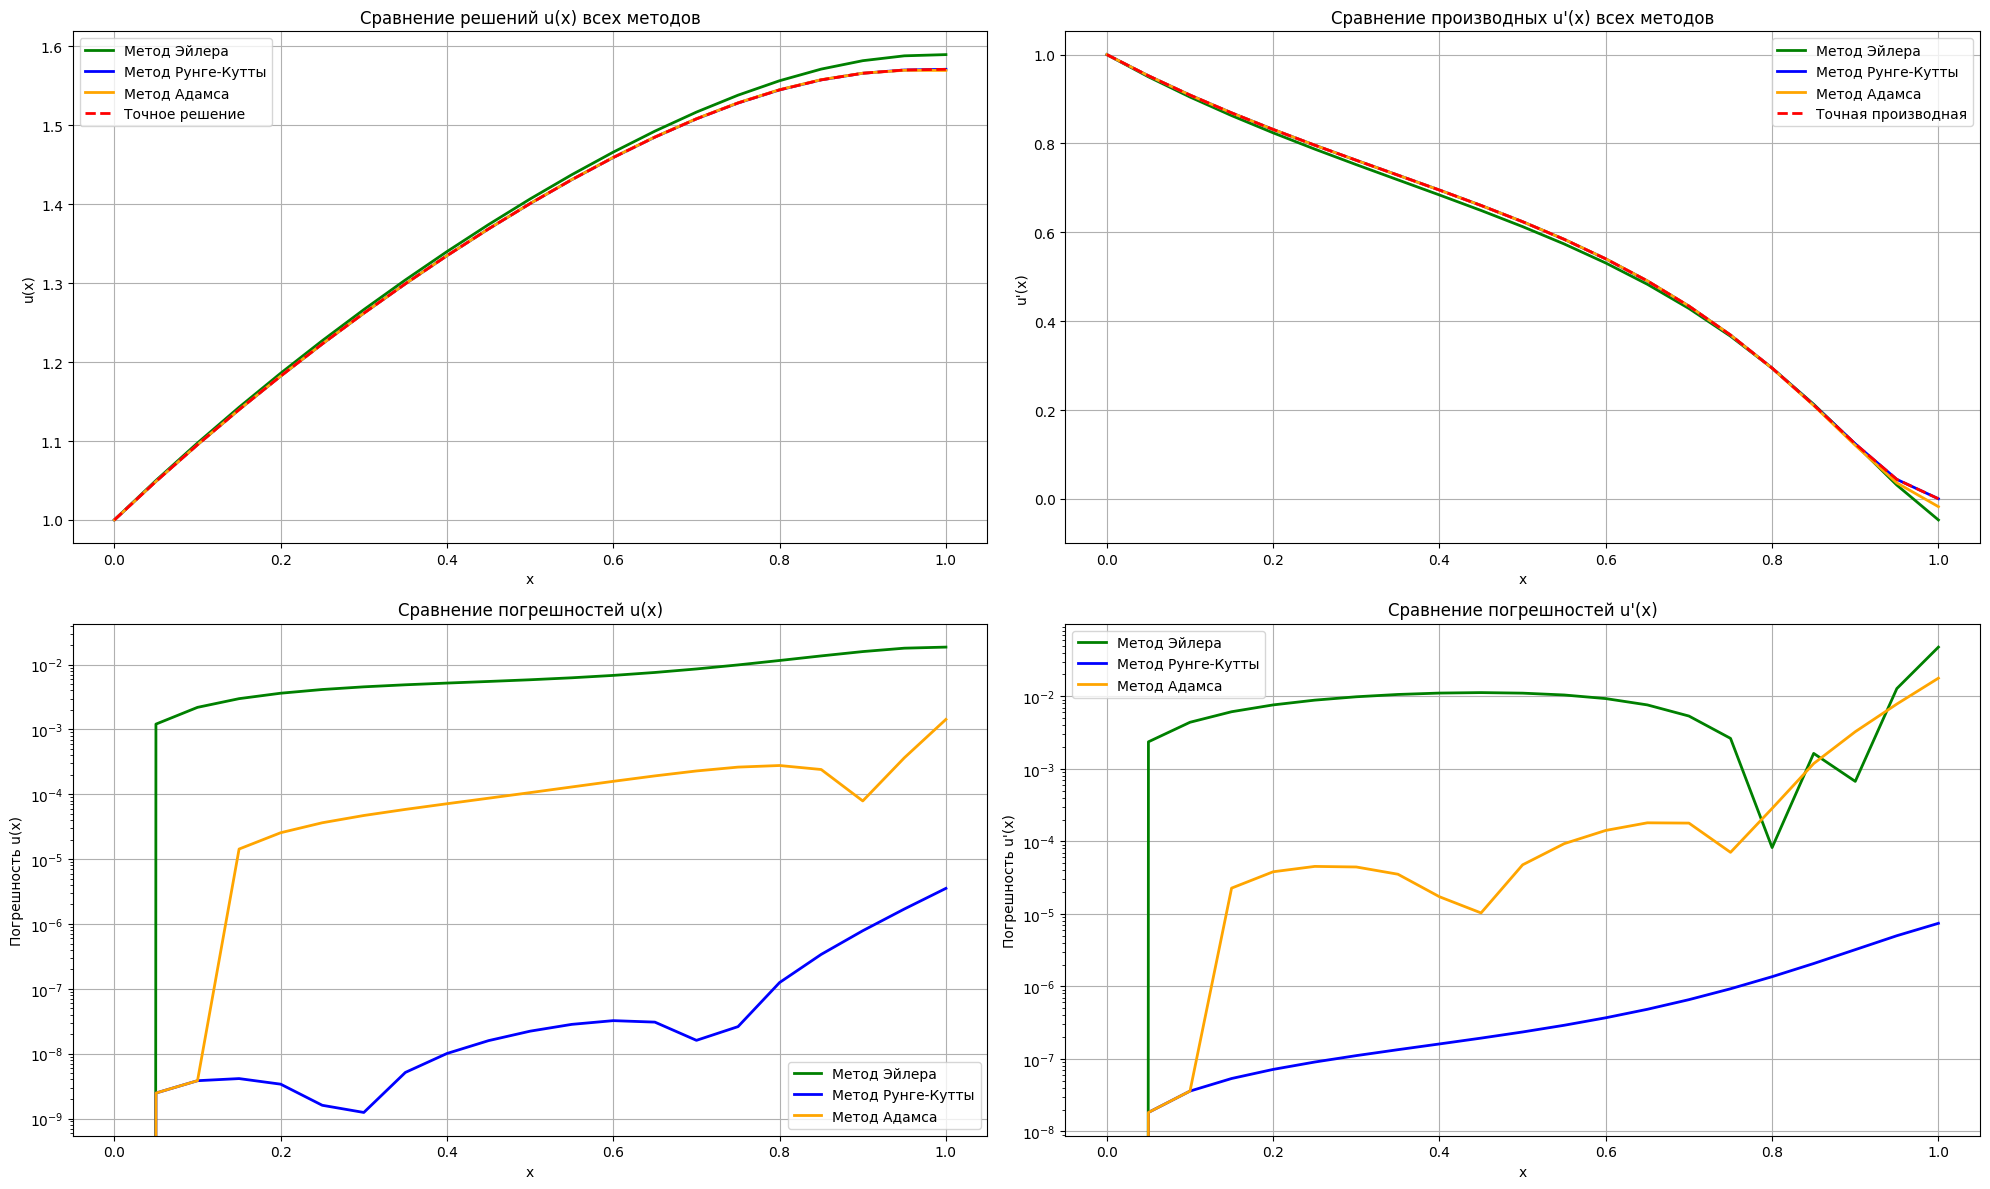

In [83]:
plt.figure(figsize=(20, 12))

#Решения u(x)
plt.subplot(2, 2, 1)
plt.plot(x_euler, u_euler, 'g-', linewidth=2, label='Метод Эйлера')
plt.plot(x_rk, u_rk, 'b-', linewidth=2, label='Метод Рунге-Кутты')
plt.plot(x_adams, u_adams, 'orange', linewidth=2, label='Метод Адамса')
plt.plot(x_adams, u_exact_adams, 'r--', linewidth=2, label='Точное решение')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Сравнение решений u(x) всех методов')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(x_euler, u_prime_euler, 'g-', linewidth=2, label='Метод Эйлера')
plt.plot(x_rk, u_prime_rk, 'b-', linewidth=2, label='Метод Рунге-Кутты')
plt.plot(x_adams, u_prime_adams, 'orange', linewidth=2, label='Метод Адамса')
plt.plot(x_adams, u_prime_exact_adams, 'r--', linewidth=2, label='Точная производная')
plt.xlabel('x')
plt.ylabel("u'(x)")
plt.title("Сравнение производных u'(x) всех методов")
plt.legend()
plt.grid(True)

# Погрешности u(x)
plt.subplot(2, 2, 3)
plt.semilogy(x_euler, error_u_euler, 'g-', linewidth=2, label='Метод Эйлера')
plt.semilogy(x_rk, error_u_rk, 'b-', linewidth=2, label='Метод Рунге-Кутты')
plt.semilogy(x_adams, error_u_adams, 'orange', linewidth=2, label='Метод Адамса')
plt.xlabel('x')
plt.ylabel('Погрешность u(x)')
plt.title('Сравнение погрешностей u(x)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.semilogy(x_euler, error_u_prime_euler, 'g-', linewidth=2, label='Метод Эйлера')
plt.semilogy(x_rk, error_u_prime_rk, 'b-', linewidth=2, label='Метод Рунге-Кутты')
plt.semilogy(x_adams, error_u_prime_adams, 'orange', linewidth=2, label='Метод Адамса')
plt.xlabel('x')
plt.ylabel("Погрешность u'(x)")
plt.title("Сравнение погрешностей u'(x)")
plt.legend()
plt.grid(True)


x_pos = np.arange(len(methods_data))
width = 0.35

plt.tight_layout()
plt.savefig(fname = "Оценки погрешностей")
plt.show()

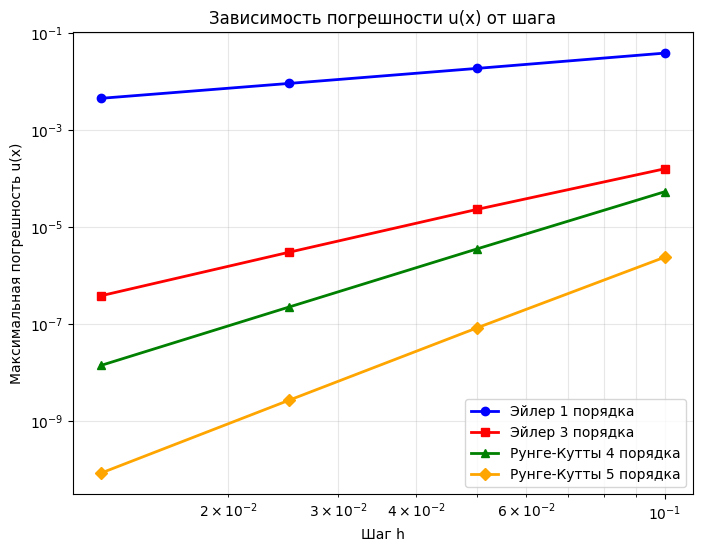

In [84]:
methods = {
    'Эйлер 1 порядка': euler_method,
    'Эйлер 3 порядка': euler_3rd_order,
    'Рунге-Кутты 4 порядка': runge_kutta,
    'Рунге-Кутты 5 порядка': runge_kutta_5th_order
}

h_values = [0.1, 0.05, 0.025, 0.0125]
results = {}

for method_name, method_func in methods.items():
    errors_u = []
    errors_u_prime = []
    
    for h in h_values:
        x, y = method_func(system_equation, y0, h)
        u_numerical = y[:, 0]
        u_prime_numerical = y[:, 1]
        u_exact = u0(x)
        u_prime_exact = du_dx(x)
        
        error_u = np.max(np.abs(u_numerical - u_exact))
        error_u_prime = np.max(np.abs(u_prime_numerical - u_prime_exact))
        
        errors_u.append(error_u)
        errors_u_prime.append(error_u_prime)
    
    orders_u = []
    orders_u_prime = []
    
    for i in range(1, len(h_values)):
        order_u = np.log(errors_u[i-1] / errors_u[i]) / np.log(h_values[i-1] / h_values[i])
        order_u_prime = np.log(errors_u_prime[i-1] / errors_u_prime[i]) / np.log(h_values[i-1] / h_values[i])
        
        orders_u.append(order_u)
        orders_u_prime.append(order_u_prime)
    
    results[method_name] = {
        'errors_u': errors_u,
        'errors_u_prime': errors_u_prime,
        'orders_u': orders_u,
        'orders_u_prime': orders_u_prime,
        'mean_order_u': np.mean(orders_u),
        'mean_order_u_prime': np.mean(orders_u_prime)
    }

theoretical_orders = {
    'Эйлер 1 порядка': 1,
    'Эйлер 3 порядка': 3,
    'Рунге-Кутты 4 порядка': 4,
    'Рунге-Кутты 5 порядка': 5
}

plt.figure(figsize=(8, 6))

colors = ['blue', 'red', 'green', 'orange', 'purple']
markers = ['o', 's', '^', 'D', 'v']

for i, method_name in enumerate(methods.keys()):
    plt.loglog(h_values, results[method_name]['errors_u'], 
               color=colors[i], marker=markers[i], linewidth=2, 
               markersize=6, label=method_name)

plt.xlabel('Шаг h')
plt.ylabel('Максимальная погрешность u(x)')
plt.title('Зависимость погрешности u(x) от шага')
plt.legend()
plt.grid(True, which='both', alpha=0.3)

plt.show()